In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [16]:
data = pd.read_csv('Subscriber-final.csv', delimiter = ';', parse_dates=['dateandtime'])

In [17]:
data.head()

,event_type,user_id,dateandtime
0,subscribe,2458151268,2018-01-01 00:07:00
1,subscribe,2458151267,2018-01-01 00:07:00
2,subscribe,2458151309,2018-01-01 00:40:00
3,subscribe,2458151358,2018-01-01 01:26:00
4,subscribe,2458151361,2018-01-01 01:30:00


In [18]:
# Filter relevant rows where the event_type is 'subscribe'
relevant_data = data[data['event_type'] == 'subscribe'].copy()

# Group and count the subscriptions using the resample method with the frequency 'W' for weekly aggregation
subscription_counts = relevant_data.resample('W', on='dateandtime')['event_type'].count()

subscription_counts

dateandtime
2018-01-07    537
2018-01-14    356
2018-01-21    418
2018-01-28    471
2018-02-04    618
2018-02-11    589
2018-02-18    572
2018-02-25    595
2018-03-04    830
2018-03-11    680
2018-03-18    558
2018-03-25    706
2018-04-01    688
Freq: W-SUN, Name: event_type, dtype: int64

In [19]:
subscription_counts.index = (subscription_counts.index - subscription_counts.index.min()).days // 7

In [20]:
# Create X and y variables for the linear regression model
X = subscription_counts.index.to_numpy().reshape(-1, 1)
y = subscription_counts.values

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Generate predictions using the model
predictions = model.predict(X)

# Calculate R-squared value
r_squared = model.score(X, y)

In [21]:
r_squared

0.5224538480996144

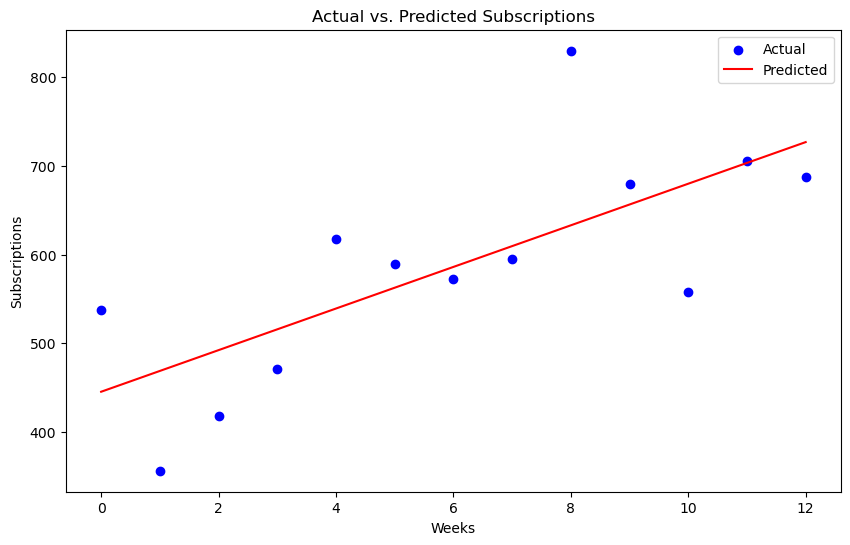

In [22]:
# Plot the actual and predicted data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, predictions, color='red', label='Predicted')
plt.xlabel('Weeks')
plt.ylabel('Subscriptions')
plt.title('Actual vs. Predicted Subscriptions')
plt.legend()
plt.show()


In [23]:
# Print R-squared value
print("R-squared: {:.2f}".format(r_squared))

R-squared: 0.52


/tmp/ipykernel_40478/1435330649.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xticks(range(0, int(max(X))+1))


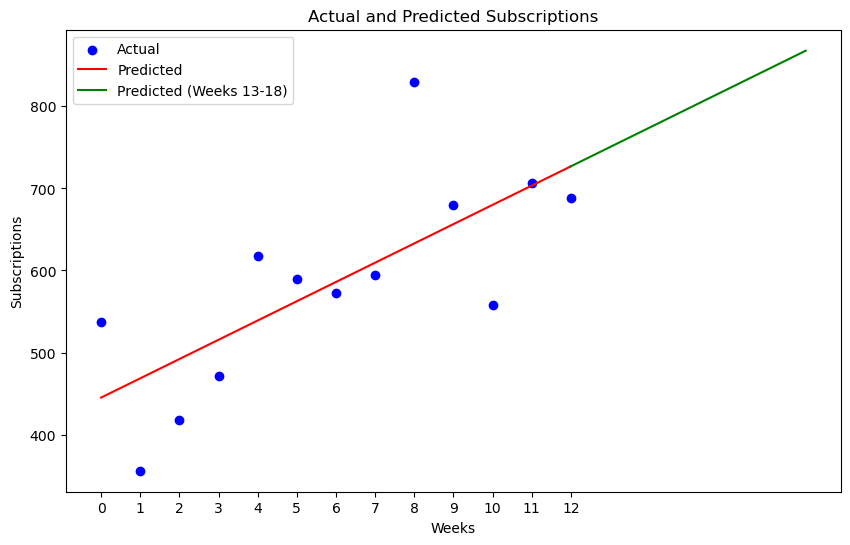

In [29]:
# Generate predictions for weeks 13-18
weeks = np.array(range(12, 19)).reshape(-1, 1)
predictions_13_to_18 = model.predict(weeks)

# Plot the actual and predicted data for weeks 13-18
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, predictions, color='red', label='Predicted')
plt.plot(weeks, predictions_13_to_18, color='green', label='Predicted (Weeks 13-18)')
plt.xlabel('Weeks')
plt.ylabel('Subscriptions')
plt.title('Actual and Predicted Subscriptions')
plt.legend()
plt.xticks(range(0, int(max(X))+1))
plt.show()

In [32]:
# Generate prediction for week 16
week_16 = np.array([[16]])
prediction_week_16 = model.predict(week_16)

# Print the prediction for week 16
print("Prediction for week 16:", prediction_week_16[0])

Prediction for week 16: 820.7802197802198
